<a href="https://colab.research.google.com/github/jljudge-gh/JupyterNotebooks-AppliedComputationalMethods/blob/main/Module_B_Section_17_4%2C_17_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module B: Interpolation**
## Sections 17.4, 17.5

### 17.4: Lagrange Polynomial Interpolation


In the following example, the Scipy implementation of the Lagrange Polynomial Interpolation is successful: x squared has been correctly identified.

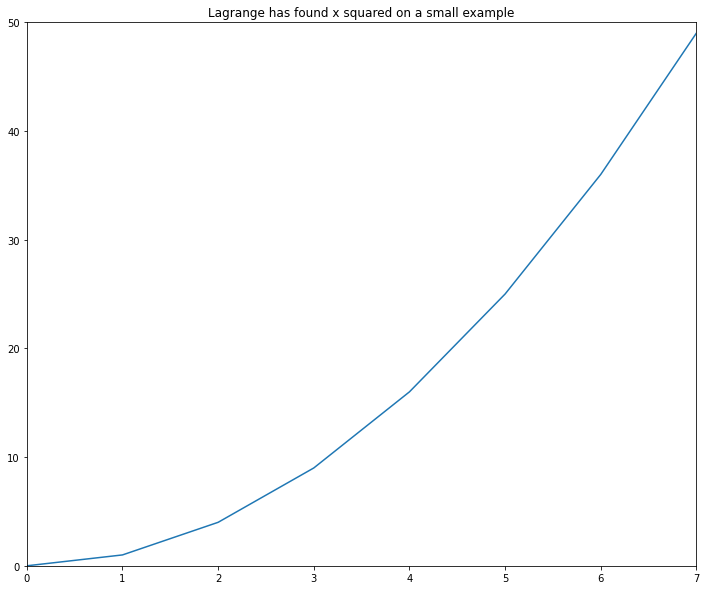

In [3]:
# Import Python packages for interpolation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as interpolate
import scipy
from numpy.polynomial.polynomial import Polynomial

# Estamte the Lagrange Interpolation for x squared based on three values
lagrange_interpolation = scipy.interpolate.lagrange([2., 4., 6.], [4., 16., 36.])

# Show the interpolated values: x squared has been found correctly
plt.figure(figsize=(12,10))
plt.plot([0., 1., 2., 3., 4., 5., 6., 7.], lagrange_interpolation([0., 1., 2., 3., 4., 5., 6., 7.]))
plt.xlim(0,7)
plt.ylim(0,50)
plt.title( 'Lagrange x squared on a small example')
plt.show()

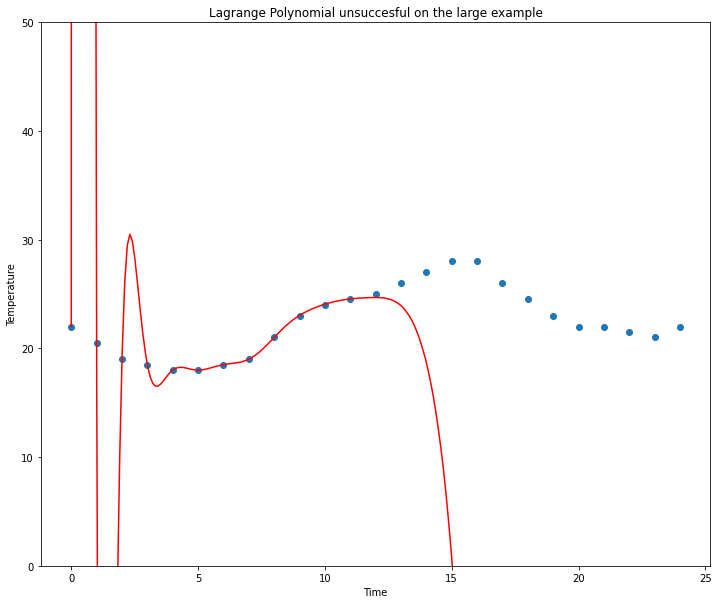

In [7]:
# Creating the data
hours = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.]
temperature_celcius = [22, 20.5, 19, 18.5, 18, 18, 18.5, 19, 21, 23, 24, 24.5, 25, 26, 27, 28, 28, 26, 24.5, 23, 22, 22, 21.5, 21, 22]

# Creating a pandas dataframe
data = pd.DataFrame({'hours': hours, 'temp': temperature_celcius })

# Printing the data
data

# Create a list with 10 'time' values per hour (6-minute interval) 
in_between_hours_scale = np.linspace(0., 24., 24*10)

# Compute the lagrange polynomial using scipy
lagrange_interpolation = scipy.interpolate.lagrange(list(data.hours), list(data.temp))

# Plot the Lagrange Polynomial against the original data
plt.figure(figsize=(12,10))
plt.ylim(0, 50)
plt.scatter(list(data.hours), list(data.temp))
plt.plot(in_between_hours_scale, lagrange_interpolation(in_between_hours_scale), 'red')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Lagrange Polynomial unsuccesful on the large example')
plt.show()

The Scipy documentation states:

> Warning: This implementation is numerically unstable. Do not expect to be able to use more than about 20 points even if they are chosen optimally.



### 17.5: Newton Polynomial Interpolation

Now that we understand that the Lagrange Polynomial Interpolation cannot work on such a large interpolation example, let’s move on to the Newton Polynomial Interpolation method and see if it gives us a better result.

In [8]:
# Credits to stack overflow for this code

def _poly_newton_coefficient(x, y):    
    """
    x: list or np array contanining x data points
    y: list or np array contanining y data points
    """

    m = len(x)

    x = np.copy(x)
    a = np.copy(y)
    for k in range(1, m):
        a[k:m] = (a[k:m] - a[k - 1])/(x[k:m] - x[k - 1])

    return a

def newton_polynomial(x_data, y_data, x):
    """
    x_data: data points at x
    y_data: data points at y
    x: evaluation point(s)
    """
    a = _poly_newton_coefficient(x_data, y_data)
    n = len(x_data) - 1  # Degree of polynomial
    p = a[n]

    for k in range(1, n + 1):
        p = a[n - k] + (x - x_data[n - k])*p

    return p

Text(0.5, 1.0, 'Newton Polynomial Interpolation solves the simple example')

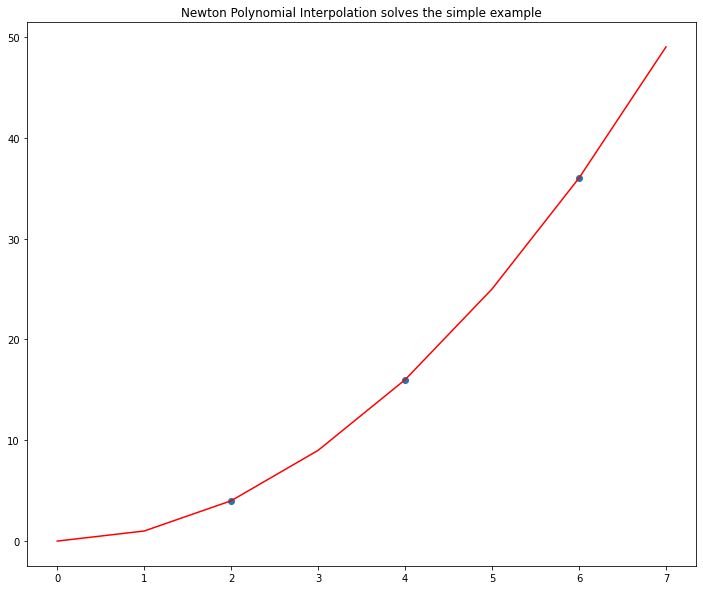

In [9]:
# Computing the Newton Polynomial Interpolation
newton_interpolation = newton_polynomial([2., 4., 6.], [4., 16., 36.], np.array([0., 1., 2., 3., 4., 5., 6., 7.]))

# Plotting the Newton Polynomial against the original data
plt.figure(figsize=(12,10))
plt.scatter([2., 4., 6.], [4., 16., 36.])
plt.plot([0., 1., 2., 3., 4., 5., 6., 7.], newton_interpolation, 'red')
plt.title('Newton Polynomial Interpolation solves the simple example')

As you see in the graph, the Newton Polynomial Interpolation has successfully found the function x-squared based on the three data points.

Text(0.5, 1.0, 'Newton Polynomial Interpolation finds a very complex polynomial that fits the data')

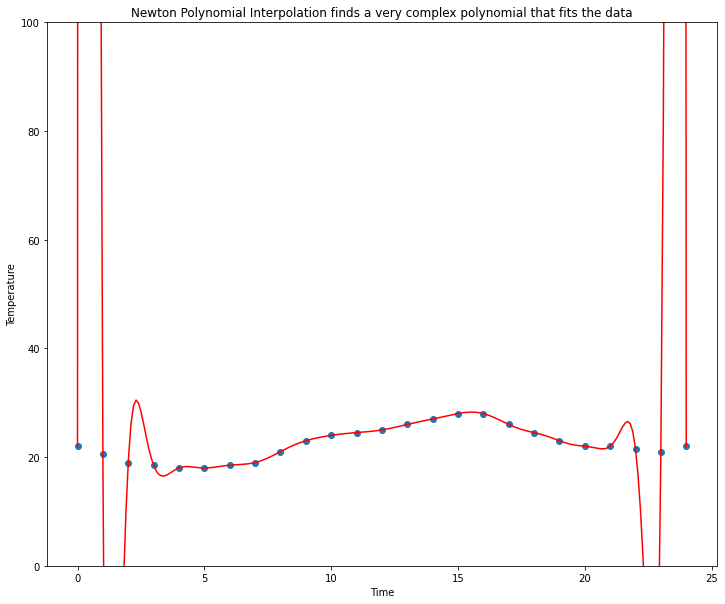

In [10]:
# Computing the Newton Polynomial Interpolation
newton_interpolation = newton_polynomial(list(data.hours), list(data.temp), in_between_hours_scale)

# Plotting the Newton Polynomial against the original data
plt.figure(figsize=(12,10))
plt.scatter(list(data.hours), list(data.temp))
plt.plot(in_between_hours_scale, newton_interpolation, 'red')
plt.ylim(0, 100)
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Newton Polynomial Interpolation finds a very complex polynomial that fits the data')

When looking at this graph, you see that, in some way, the Newton implementation has worked better than the Lagrange implementation: at least Newton goes through all of the data points.

This clearly shows the disadvantage of polynomial interpolation in its official definition. You force the model to find one and only one polynomial to fit all your data points, but your data does not actually follow a perfect polynomial. The solution is therefore often a forced, overly complex polynomial with some extreme errors at certain locations.